## Introduction

Preliminary analysis COVID-19 - Europe countries.


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
import folium
from folium.plugins import HeatMap, HeatMapWithTime
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_df = pd.read_csv(os.path.join("..", "data", "johnhopkins-covid19-curated", "covid-19-all.csv"))

In [3]:
data_df['Date'] = pd.to_datetime(data_df['Date'])
data_df['Country'] = data_df['Country/Region']
data_df['Province'] = data_df['Province/State']

data_ct = data_df.sort_values(by = ['Country','Date'], ascending=False)
filtered_data_ct_last = data_ct.drop_duplicates(subset = ['Country'], keep='first')
data_ct_agg = data_ct.groupby(['Date', 'Country']).sum().reset_index()
data_ct_agg['Active'] = data_ct_agg['Confirmed'] - data_ct_agg['Deaths'] - data_ct_agg['Recovered']


In [4]:
def plot_time_variation_countries_group_of_features(df, countries, features,title):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(6,6,figsize=(20, 20))

    for country in countries:
        plt.subplot(6,6,i + 1)
        df_ = df[(df['Country']==country) & (df['Date'] > '2020-02-01')] 
        df_['date'] = df_['Date'].apply(lambda x: x.timetuple().tm_yday)
        for feature in features:
            g = sns.lineplot(x="date", y=feature, data=df_,  label=feature)
        plt.title(f'{country}') 
        plt.xlabel('')
        i = i + 1
    fig.suptitle(title, fontsize=20)
    plt.show()  

In [5]:
eu28plus_countries = ['Austria','Belgium','Italy','Latvia','Bulgaria','Lithuania','Croatia','Luxembourg','Cyprus',
                  'Malta','Czech Republic','Netherlands','Denmark','Poland','Estonia','Portugal','Finland','Romania',
                  'France','Slovakia','Germany','Slovenia','Greece','Spain','Hungary','Sweden','Ireland','Switzerland', 'Norway', 'Israel',
                     'Serbia', 'Montenegro', 'North Macedonia', 'United Kingdom', 'Russia', 'Iceland']

features = ['Recovered', 'Active']
eu28plus_countries.sort()

<Figure size 432x288 with 0 Axes>

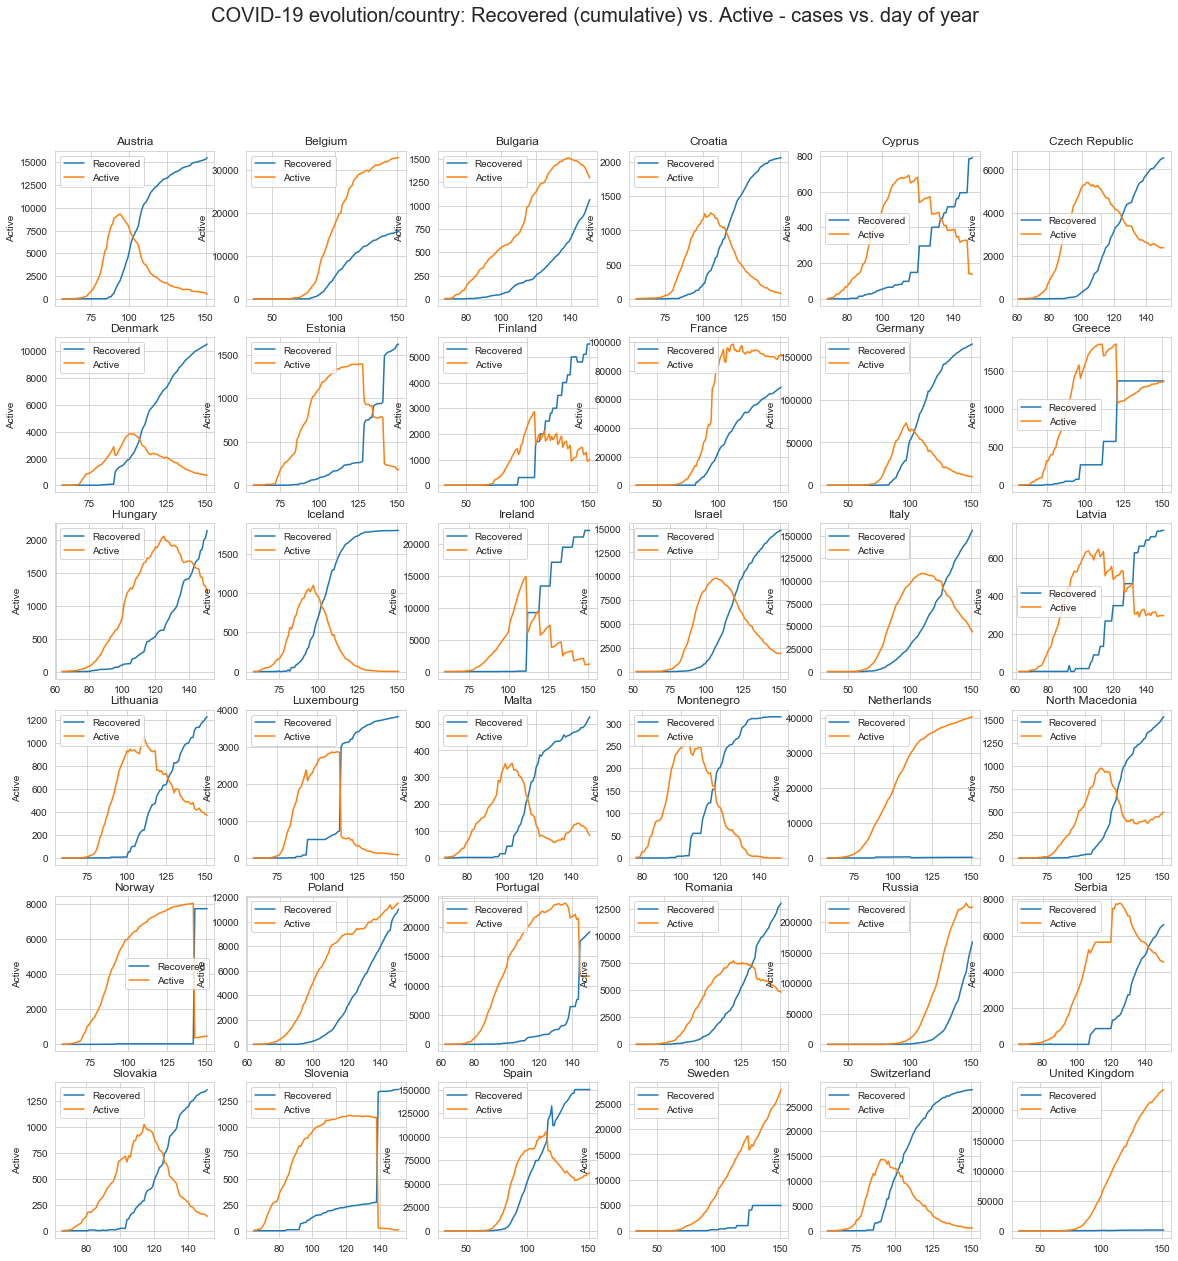

In [6]:
plot_time_variation_countries_group_of_features(data_ct_agg, eu28plus_countries, features, 
                            'COVID-19 evolution/country: Recovered (cumulative) vs. Active - cases vs. day of year')

In [7]:
data_ps = data_df.sort_values(by = ['Province','Date'], ascending=False)
filtered_data_ps = data_ps.drop_duplicates(subset = ['Province'],keep='first').reset_index()

data_cr = data_df.sort_values(by = ['Country','Date'], ascending=False)
filtered_data_cr = data_cr.drop_duplicates(subset = ['Country'],keep='first').reset_index()

filtered_data_cr = filtered_data_cr.loc[~filtered_data_cr.Latitude.isna()]
filtered_data_cr = filtered_data_cr.loc[~filtered_data_cr.Longitude.isna()]
filtered_data = pd.concat([filtered_data_cr, filtered_data_ps], axis=0).reset_index()

filtered_data = filtered_data.loc[filtered_data.Country.isin(eu28plus_countries)]

In [12]:
m = folium.Map(location=[54,15], zoom_start=4)
max_val = max(filtered_data['Confirmed'])
HeatMap(data=filtered_data[['Latitude', 'Longitude', 'Confirmed']],\
        radius=30, max_zoom=16).add_to(m)
m